In [78]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv('data/nursery.csv')

In [79]:
data

,parents_occupation,has_nursery,family_form,children,housing,finance,social_conditions,health_conditions,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


([<matplotlib.patches.Wedge at 0x21e6593df10>,
 [Text(0.5499999702695115, 0.9526279613277875, 'not_recom - 4320 instances'),
  Text(-1.099905761859237, 0.014398438417121353, 'priority - 4266 instances'),
  Text(0.4590724926596959, -0.9996261533609521, 'spec_prior - 4044 instances'),
  Text(1.096439658817035, -0.08843118552402228, 'very_recom - 328 instances'),
  Text(1.0999998708532464, -0.0005330317454808764, 'recommend - 2 instances')])

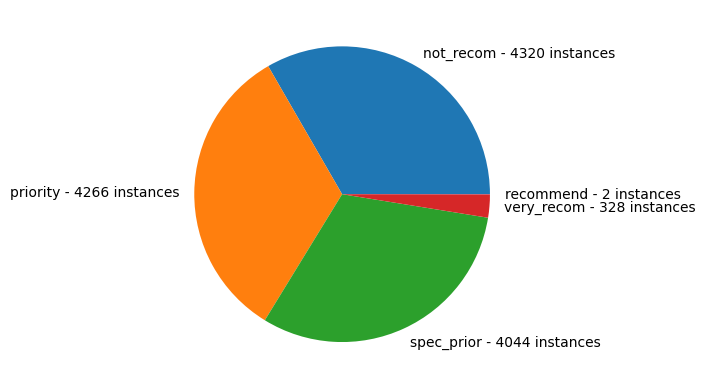

In [80]:
import matplotlib.pyplot as plt
counted = data['class'].value_counts()
names = []
numbers = []
for name, number in counted.items():
    names.append(f'{name} - {number} instances')
    numbers.append(number)
plt.pie(numbers, labels = names)


### Usunięcie klas recommend i very_recom

In [81]:
data = data[(data['class'] != 'recommend') & (data['class'] != 'very_recom')]

In [82]:
data

,parents_occupation,has_nursery,family_form,children,housing,finance,social_conditions,health_conditions,class
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


([<matplotlib.patches.Wedge at 0x21e63481ac0>,
 [Text(0.5237321326754252, 0.9673182791631981, 'not_recom - 4320 instances'),
  Text(-1.0974087928280991, -0.0754582097824646, 'priority - 4266 instances'),
  Text(0.5888547794830602, -0.9291125059323853, 'spec_prior - 4044 instances')])

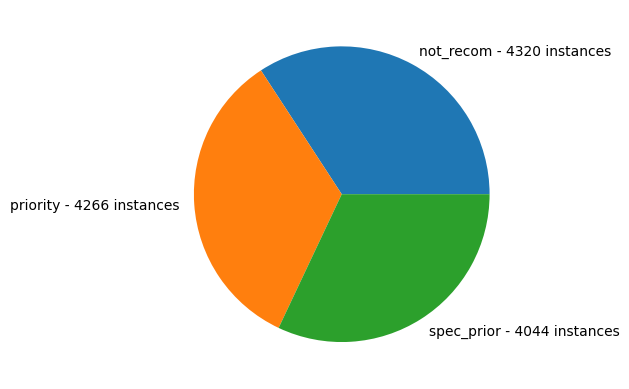

In [83]:
import matplotlib.pyplot as plt
counted = data['class'].value_counts()
names = []
numbers = []
for name, number in counted.items():
    names.append(f'{name} - {number} instances')
    numbers.append(number)
plt.pie(numbers, labels = names)


### Usunięcie niespójności

In [84]:
conditional_df = data.drop(columns=['class'])

In [85]:
conditional_df.duplicated().any()

False

Po usunięciu klasy decyzyjnej nie powstały żadne zduplikowane wiersze - to oznacza, że nie zachodzi sytuacja w której w oryginalnej tablicy decyzyjnej istnieją wiersze o tych samych atrybutach warunkowych i różnych decyzjach <- nie zachodzi wcale pierwszy warunek (nie istnieją wiersze o tych samych atrybutach warunkowych)

### Sprawdzenie czy w zbiorze nie ma kolumny w której kazda komórka jest różna- takie atrybuty nalezy usunąć.

In [86]:
set(list(data['class'].values))

{'not_recom', 'priority', 'spec_prior'}

In [87]:
for col in data.columns:
    unique_values_num = data[col].nunique()
    print(f'Col {col}: {unique_values_num}- {set(list(data[col].values))}')


Col parents_occupation: 3- {'usual', 'great_pret', 'pretentious'}
Col has_nursery: 5- {'critical', 'very_crit', 'proper', 'improper', 'less_proper'}
Col family_form: 4- {'foster', 'complete', 'incomplete', 'completed'}
Col children: 4- {'1', '2', 'more', '3'}
Col housing: 3- {'convenient', 'critical', 'less_conv'}
Col finance: 2- {'convenient', 'inconv'}
Col social_conditions: 3- {'nonprob', 'problematic', 'slightly_prob'}
Col health_conditions: 3- {'recommended', 'priority', 'not_recom'}
Col class: 3- {'priority', 'spec_prior', 'not_recom'}


In [88]:
# data['class'] = data['class'].replace('not_recom', 0)
# data['class'] = data['class'].replace('priority', 1)
# data['class'] = data['class'].replace('spec_prior', 2)


In [89]:
data.head()

,parents_occupation,has_nursery,family_form,children,housing,finance,social_conditions,health_conditions,class
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority


In [90]:
len(data)

12630

### One Hot Encoding

In [91]:
encoder = OneHotEncoder(sparse_output=False)
conditional_columns = [col for col in data.columns if col != 'class']
one_hot_encoded = encoder.fit_transform(data[conditional_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                            columns=encoder.get_feature_names_out(conditional_columns), 
                            index=data.index)
data_encoded = pd.concat([data.drop(conditional_columns, axis=1), one_hot_df], axis=1)

In [92]:
data_encoded

,class,parents_occupation_great_pret,parents_occupation_pretentious,parents_occupation_usual,has_nursery_critical,has_nursery_improper,has_nursery_less_proper,has_nursery_proper,has_nursery_very_crit,family_form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_conditions_nonprob,social_conditions_problematic,social_conditions_slightly_prob,health_conditions_not_recom,health_conditions_priority,health_conditions_recommended
1,priority,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,not_recom,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,priority,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,not_recom,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,priority,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,spec_prior,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
12956,not_recom,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
12957,spec_prior,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
12958,spec_prior,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [93]:
data_encoded

,class,parents_occupation_great_pret,parents_occupation_pretentious,parents_occupation_usual,has_nursery_critical,has_nursery_improper,has_nursery_less_proper,has_nursery_proper,has_nursery_very_crit,family_form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_conditions_nonprob,social_conditions_problematic,social_conditions_slightly_prob,health_conditions_not_recom,health_conditions_priority,health_conditions_recommended
1,priority,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,not_recom,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,priority,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,not_recom,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,priority,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,spec_prior,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
12956,not_recom,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
12957,spec_prior,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
12958,spec_prior,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [94]:
len(data_encoded)

12630

In [95]:
data_encoded.drop_duplicates(inplace=True)

In [96]:
len(data_encoded)

12630

In [97]:
data_encoded

,class,parents_occupation_great_pret,parents_occupation_pretentious,parents_occupation_usual,has_nursery_critical,has_nursery_improper,has_nursery_less_proper,has_nursery_proper,has_nursery_very_crit,family_form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_conditions_nonprob,social_conditions_problematic,social_conditions_slightly_prob,health_conditions_not_recom,health_conditions_priority,health_conditions_recommended
1,priority,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,not_recom,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,priority,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,not_recom,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,priority,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,spec_prior,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
12956,not_recom,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
12957,spec_prior,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
12958,spec_prior,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [98]:
data_encoded.to_csv('data/nursery_preprocessed.csv', index=False)